##Importing libraries and reading datasets
To start off, we first import relevant libraries that we will be using for the cleaning & preparation of a dataset relevant to the question. Also, we will read in the necessary cleaned datasets in answering our question:

**3. How can we improve the efficiency of our supply chain?**
- Analyze supplier performance and identify bottlenecks.
- Optimize order fulfillment processes to reduce delivery times.

For ensuring reproducibility of our analysis, we will be setting a seed as well.

In [4]:
# # For google colab purposes, ignore if not using google colab to import files
# # If uploading, upload orders.csv and products.csv
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

In [6]:
# Read in datasets that we will be using for our analysis
orders_dataset = pd.read_csv("../Cleaned_Datasets/orders.csv")
products_dataset = pd.read_csv("../Cleaned_Datasets/products.csv")

In [7]:
# We standardise all floats to be of 2 significant figures
pd.options.display.float_format = '{:.2f}'.format

##Data Integration

For our question, we will need columns from both the orders and products dataset. Each order have product(s) that have an id, so we will be using the product_id as a common key to join both datasets. The final dataset after joining would contain the order and product details, which we will call as our deliveries dataset.

In [8]:
deliveries = pd.merge(orders_dataset, products_dataset, on='product_id')
deliveries

,order_id,order_time,product_id,customer_id,is_campaign,additional_discount,campaign_name,price_ori,item_category_detail,title,...,price_actual,total_rating,total_sold,favorite,desc,Stock,Ships_From,main_category,mid_category,sub_category
0,1,2019-12-22 08:16:00,15969,299,False,0.00,NaN,34.33,Shopee | Women Clothes | Sports & Beachwear | ...,Korea swimming suit women diving suit women sp...,...,24.03,12.00,12.00,49.00,🎀Welcome to shop，we offer the lowest price wi...,24844,Singapore,Women Clothes,Sports & Beachwear,Swimsuits
1,2,2019-12-17 08:05:00,18176,299,False,0.00,,5.57,Shopee | Home & Living | Handmade | Gift Wrapping,+-100PCS ORGANZA POUCH / UNCANG BAG / BAG ORGA...,...,3.71,1600.00,1600.00,1500.00,ORGANZA BAG\r\nSIZE BESAR !!!\r\n\r\nSize: 10c...,6822,Malaysia,Home & Living,Handmade,Gift Wrapping
2,3,2019-11-08 11:08:00,9272,299,False,0.00,NaN,1.09,Shopee | Health & Beauty | Sun Care | Body Sun...,MAYCREATE Whitening Sunscreen Spray UV Protect...,...,1.09,30.00,30.00,22.00,MAYCREATE Whitening Sunscreen Spray UV Protect...,5949,Malaysia,Health & Beauty,Sun Care,Body Sunscreen & After Sun
3,4,2019-11-21 20:12:00,8001,299,False,0.00,NaN,7.79,Shopee | Men Clothes | Suits | Suit Vests & Wa...,DIAMOND Men Singlet Cotton Sleeveless Elastic ...,...,2.38,6.00,6.00,7.00,***Pls follow the size chart***\r\n1. Product ...,157,Malaysia,Men Clothes,Suits,Suit Vests & Waistcoats
4,5,2019-11-16 08:13:00,16745,299,False,0.00,NaN,102.08,Shopee | Baby & Toys | Formula & Food | Toddle...,Pediasure Peptigro Child Nutrition Supplement ...,...,92.80,135.00,135.00,34.00,PediaSure® is a nutritional supplement that pr...,1052,Singapore,Baby & Toys,Formula & Food,Toddler Milk (1-3 years)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91340,91341,2019-07-26 16:51:00,14069,127744,False,0.00,NaN,0.49,Shopee | Groceries & Pets | Fresh & Frozen Foo...,"Pokok Yankee, Sulur Nenas Manis&Besar (Min10-2...",...,0.49,8.00,8.00,11.00,Minimum order sulur 10 pcs- 200 pcs\r\n\r\n🍍Su...,505,Malaysia,Groceries & Pets,Fresh & Frozen Food,Fruits
91341,91342,2019-08-01 08:49:00,9401,127744,False,0.00,NaN,68.48,Shopee | Baby & Toys | Feeding & Nursing | Ste...,Samu Giken Baby Bottles Sterilizer & Steamer w...,...,40.45,26.00,26.00,185.00,Samu Giken 2-in-1 Electric Sterilizer & Steam...,61,Malaysia,Baby & Toys,Feeding & Nursing,Sterilisers & Warmers
91342,91343,2019-02-05 13:46:00,1241,127744,True,50.00,Other Seasonal Sales Date,6.23,Shopee | Health & Beauty | Face Make Up | Conc...,【Ready Stock】Pinkflash OhMyBreath Breathable L...,...,1.33,10100.00,10100.00,6200.00,"PINKFLASH #OhMyBreath ""Breathable concealer""，i...",45373,China,Health & Beauty,Face Make Up,Concealer
91343,91344,2019-01-18 07:47:00,4466,127744,False,0.00,NaN,152.28,Shopee | Watches | Women's Watches | Women's B...,Ice-Watch ICE Generation - Black Gold / White ...,...,46.40,128.00,128.00,686.00,Sold by Authorised Distributor: Ice-Watch Mala...,31,Singapore,Watches,Women's Watches,Women's Business


To simplify our handling of the data structure and inspection for later, we will select columns that are relevant in answering the question.


In [9]:
deliveries = deliveries.loc[:, ['order_id', 'order_time', 'product_id', 'item_rating', 'seller_name', 'Ships_From', 'main_category']]
deliveries

,order_id,order_time,product_id,item_rating,seller_name,Ships_From,main_category
0,1,2019-12-22 08:16:00,15969,4.7,lihe15981868644.my,Singapore,Women Clothes
1,2,2019-12-17 08:05:00,18176,4.9,rainbowperkahwinan.os,Malaysia,Home & Living
2,3,2019-11-08 11:08:00,9272,4.9,jpro_online,Malaysia,Health & Beauty
3,4,2019-11-21 20:12:00,8001,5.0,diamondshop88,Malaysia,Men Clothes
4,5,2019-11-16 08:13:00,16745,5.0,pediasure.os,Singapore,Baby & Toys
...,...,...,...,...,...,...,...
91340,91341,2019-07-26 16:51:00,14069,4.6,nursery_pokok_bunga,Malaysia,Groceries & Pets
91341,91342,2019-08-01 08:49:00,9401,5.0,samugiken.os,Malaysia,Baby & Toys
91342,91343,2019-02-05 13:46:00,1241,5.0,pinkflash.os,China,Health & Beauty
91343,91344,2019-01-18 07:47:00,4466,4.9,icewatch.os,Singapore,Watches


Next, to ensure data compatibility and consistency, we will do the following:
1. Standardize data formats
2. Resolve naming conventions

In [10]:
# We see what are the initial datatypes of the selected columns
print("Datatypes: ")
print(deliveries.dtypes)

Datatypes: 
order_id          int64
order_time       object
product_id        int64
item_rating      object
seller_name      object
Ships_From       object
main_category    object
dtype: object


1. Standardizing data formats

We notice that under item_rating, there were some rows that do not have a rating, and is labelled as 'No ratings yet', or have an inappropriate value (-1)

The former makes us not able to straight away standardize the column's datatype as a float

To resolve this issue, we choose to remove these rows from the dataset as they can skew our analysis that rely on rating values later on, which is part of our analysis plan.

Also, there were a few seller names that were missing, so we simply removed these rows as well.




In [11]:
# 1. Standardizing data formats
deliveries['order_time'] = pd.to_datetime(orders_dataset['order_time'])

def drop_missing_values(df):
    # Drop rows with missing data in column: 'seller_name'
    df = df.dropna(subset=['seller_name'])
    # Filter rows based on column: 'item_rating'
    df = df[df['item_rating'] != "No ratings yet"]
    # Change column type to float64 for column: 'item_rating'
    df = df.astype({'item_rating': 'float64'})
    # Filter rows based on column: 'item_rating'
    df = df[df['item_rating'] >= 0]
    return df

deliveries = drop_missing_values(deliveries)

# Afterwards, we convert order_time into the datetime type, and seller_name, Ships_From and main_category to type string
deliveries['order_time'] = pd.to_datetime(deliveries['order_time'])
deliveries = deliveries.astype({
    'seller_name': 'string',  # Convert to string
    'Ships_From': 'string',   # Convert to string
    'main_category': 'string'  # Convert to string
})

2. Resolving naming conventions

We standardised all column names to use snake case.
The only column that does not follow is 'Ships_From'.

In [12]:
# 2. Resolve naming conventions
# Rename column 'Ships_From' to 'shipped_from'
deliveries = deliveries.rename(columns={'Ships_From': 'shipped_from'})

After doing the two steps above, let's verify that our dataset have the appropriate datatypes and naming conventions.

In [13]:
# Checking if each column have the correct respective datatypes
print("Datatypes: ")
print(deliveries.dtypes)
print()

# Checking the first few rows of the dataset
deliveries.head()

Datatypes: 
order_id                  int64
order_time       datetime64[ns]
product_id                int64
item_rating             float64
seller_name      string[python]
shipped_from     string[python]
main_category    string[python]
dtype: object



,order_id,order_time,product_id,item_rating,seller_name,shipped_from,main_category
0,1,2019-12-22 08:16:00,15969,4.70,lihe15981868644.my,Singapore,Women Clothes
1,2,2019-12-17 08:05:00,18176,4.90,rainbowperkahwinan.os,Malaysia,Home & Living
2,3,2019-11-08 11:08:00,9272,4.90,jpro_online,Malaysia,Health & Beauty
3,4,2019-11-21 20:12:00,8001,5.00,diamondshop88,Malaysia,Men Clothes
4,5,2019-11-16 08:13:00,16745,5.00,pediasure.os,Singapore,Baby & Toys


#Generating synthetic columns




These 7 columns, however, are not sufficient to do the required analysis on the question. Recall, our question is about improving the efficiency of the supply chain, and we have chosen to focus on the return & reverse logistics part given the severity of its costs. It is clear that we require a lot more columns that can give us more details to analyse the bottlenecks, and thereafter suggest improvements.

We have chosen to focus on 2 parts of the supply chain for improving their efficiency:

1. Customer service (Pre & Post Purchase)
2. Shipping & Last-Mile Delivery

Thus, in the subsequent code blocks, we work on generating synthetic columns for doing our analysis. To give an overview, here are the columns we are going to generate:
1. seller_rating
2. average_seller_response_time
3. delivery_time
4. return_request
5. late_delivery

**1. seller_rating: Rating from 0-5 stars given to seller based on
seller's service**

Here, we assume that for each seller, their rating is the average item rating of all the items they have sold.

This helps us to provide an aggregate view of customer satisfaction, capturing how each seller performs generally across their products.
We will also be using the seller rating to generate other synthetic columns such as seller_response_time.

In [14]:
deliveries['seller_rating'] = deliveries.groupby('seller_name')['item_rating'].transform('mean')

**2. seller_response_time: Average time taken (in hours) for seller to respond to customer queries**

Here, we use our synthetic column 'seller_rating' to generate this synthetic column 'seller_response_time'.

We assume that generally speaking, the better the seller_rating (i.e closer to 5 stars), the better that seller's service is and the more likely they are to be responsive to customer queries, thus having a faster response time.

To do so, we split the seller_rating data into categories of how they are rated, and thereafter choose a random value from a reasonable range of values for that specific rating. For example, a seller with seller_rating of 5 stars have a response time between 0.01 - 0.5 hours.

Realistically, real-world data would have some level of noise and anomalies (i.e sellers who have low rating have fast response times)
Thus, here we introduce some outliers (e.g., very fast/slow response times) for certain sellers to improve the robustness and realism of our dataset.

In [15]:
def generate_seller_response_time(df):

    # The function response_time_by_rating takes in the seller_rating and outputs a random number from a set range of values for
    # that specific seller rating
    def response_time_by_rating(seller_rating):
        if seller_rating >= 5.0:
            return np.random.uniform(0.01, 0.5)
        elif seller_rating >= 4.9:
            return np.random.uniform(0.05, 1)
        elif seller_rating >= 4.8:
            return np.random.uniform(0.3, 2)
        elif seller_rating >= 4.7:
            return np.random.uniform(0.5, 4)
        elif seller_rating >= 4.6:
            return np.random.uniform(0.8, 8)
        elif seller_rating >= 4.5:
            return np.random.uniform(1, 16)
        elif seller_rating >= 4.4:
            return np.random.uniform(1.2, 32)
        elif seller_rating >= 4.3:
            return np.random.uniform(2.4, 35)
        elif seller_rating >= 4.2:
            return np.random.uniform(4.8, 38)
        elif seller_rating >= 4.1:
            return np.random.uniform(5, 40)
        elif seller_rating >= 4.0:
            return np.random.uniform(6, 50)
        else:
            return np.random.uniform(10, 80)

    # Apply the above function 'response_time_by_rating' to the dataset
    df['seller_response_time'] = df['seller_rating'].apply(response_time_by_rating)

    # Introduce noise and outliers/anomalies
    for seller in df['seller_name'].unique():
        # we set a 5% chance for each seller to be an outlier
        if np.random.rand() < 0.05:
            df.loc[df['seller_name'] == seller, 'seller_response_time'] = df.loc[
                df['seller_name'] == seller, 'seller_response_time'
            ].apply(lambda x: x * np.random.uniform(0.2, 10))  # Multiply response time by a random factor

    return df

# We apply the above 'generate_seller_response_time' function to our dataset
deliveries = generate_seller_response_time(deliveries)

**3. delivery_time_in_days: Time taken (in days) for product to be delivered**

Here, we use 2 columns: item_rating & ship_from to generate this synthetic column

We assume that the item ratings are related to the delivery times, because in ecommerce settings, fast and reliable delivery can positively impact customer satisfaction. Ratings often reflect a combination of factors, and delivery time is a critical aspect of customer experience for online purchases. Thus, a higher item rating is likely to correspond to a faster delivery time.

Additionally, there is no doubt that if a product is shipped from some country further, it is likely that more time is needed to ship the product. For this reason, we add a random number from a set reasonable range to the delivery time for countries that are located further.

Once again, to enhance the realism of our synthetic data, we introduce some outliers (e.g., very long/short delivery times) for certain sellers
    
Eg. An item with a lower rating is delivered to the customer earlier than that of an item with higher rating

In [16]:
def generate_delivery_time(df):

    # Function that takes in the item_rating and outputs a random number from a set range corresponding to that specific item's rating
    # For example, an item rating of 5 stars would mean that the item takes about 1-3 days to be delivered to the customer
    def delivery_time_by_rating(item_rating):
        if item_rating >= 5.0:
            return np.random.uniform(1, 3)
        elif item_rating >= 4.9:
            return np.random.uniform(1, 3.5)
        elif item_rating >= 4.8:
            return np.random.uniform(1.5, 4)
        elif item_rating >= 4.7:
            return np.random.uniform(1.5, 4.5)
        elif item_rating >= 4.6:
            return np.random.uniform(2, 5)
        elif item_rating >= 4.5:
            return np.random.uniform(2, 5.5)
        elif item_rating >= 4.4:
            return np.random.uniform(2.5, 6)
        elif item_rating >= 4.3:
            return np.random.uniform(2.5, 6.5)
        elif item_rating >= 4.2:
            return np.random.uniform(3, 7)
        elif item_rating >= 4.1:
            return np.random.uniform(3, 7.5)
        elif item_rating >= 4.0:
            return np.random.uniform(3.5, 8)
        else:
            return np.random.uniform(7, 21)

    # We apply the above function 'delivery_time_by_rating' to each row of our dataset
    df['delivery_time'] = df['item_rating'].apply(delivery_time_by_rating)

    for seller in df['seller_name'].unique():
        # we set a 5% chance for each seller to be an outlier
        if np.random.rand() < 0.05:
            df.loc[df['seller_name'] == seller, 'delivery_time'] = df.loc[
                df['seller_name'] == seller, 'delivery_time'
            ].apply(lambda x: x * np.random.uniform(0.5, 3))  # Multiply delivery time by a random factor

    # Adding additional delivery time in days based on ship_from column
    def add_delivery_time_by_ship_from(ship_from):
        if ship_from == 'China':
            return np.random.uniform(7, 14)
        elif ship_from == 'Indonesia':
            return np.random.uniform(3, 5)
        elif ship_from == 'Malaysia':
            return np.random.uniform(2, 4)
        elif ship_from == 'South Korea':
            return np.random.uniform(5, 10)
        elif ship_from == 'Taiwan':
            return np.random.uniform(5, 9)
        elif ship_from == 'Thailand':
            return np.random.uniform(3, 6)
        elif ship_from == 'Vietnam':
            return np.random.uniform(4, 7)
        elif ship_from == 'Singapore':
            return 0


    # Applying the above functions to the dataset
    df['additional_delivery_time'] = df['shipped_from'].apply(add_delivery_time_by_ship_from)
    df['delivery_time'] = df['delivery_time'] + df['additional_delivery_time']

    return df

# We apply the above 'generate_delivery_time' function to our 2 datasets
deliveries = generate_delivery_time(deliveries)

**4. return_request: Boolean value indicating if customer requests for the product to be returned**

Here, we use both the item_rating and seller_rating (synthetic) to generate the synthetic column 'return_request'

We assume that both of these ratings can plausibly influence a customer's likelihood of returning a product.

Reason 1: Lower item_rating scores likely indicate that customers were dissatisfied with the product itself due to quality, performance or usability issues. Thus, dissatisfied customers are more prone to request returns.

Reason 2: Lower seller_rating could indicate issues with the seller's overall service, such as inaccurate product descriptions. This is likely to cause dissatisfied customers and thus likely for return requests.

Therefore, for products with lower item_rating & seller_rating, they have a higher probability for return_request to be True.

In [17]:
# Define return probabilities based on main_category
return_probabilities = {
    'Automotive': 0.08,
    'Baby & Toys': 0.12,
    'Cameras & Drones': 0.13,
    'Computer & Accessories': 0.13,
    'Fashion Accessories': 0.18,
    'Games, Books & Hobbies': 0.07,
    'Gaming & Consoles': 0.11,
    'Groceries & Pets': 0.03,
    'Health & Beauty': 0.13,
    'Home & Living': 0.11,
    'Home Appliances': 0.10,
    'Men Clothes': 0.30,
    'Men Shoes': 0.23,
    'Men’s Bags & Wallets': 0.13,
    'Mobile & Accessories': 0.12,
    'Others': 0.08,
    'Sports & Outdoor': 0.12,
    'Tickets & Vouchers': 0.02,
    'Travel & Luggage': 0.11,
    'Watches': 0.18,
    'Women Clothes': 0.27,
    'Women Shoes': 0.21,
    'Women’s Bags': 0.17
}

# Function to adjust return probability based on item rating
def calculate_adjusted_probability(base_prob, item_rating):
    # Define a scaling factor that reduces/increases probability based on rating
    # E.g., ratings < 3 increase return rate, while ratings >= 4.5 slightly reduce it
    if item_rating >= 5.0:
        adjusted_prob = (base_prob * np.random.uniform(0,0.5))
    elif item_rating >= 4.9:
        adjusted_prob = (base_prob * np.random.uniform(0.4,0.8))
    elif item_rating >= 4.8:
        adjusted_prob = (base_prob * np.random.uniform(0.4,0.9))
    elif item_rating >= 4.7:
        adjusted_prob = (base_prob * np.random.uniform(0.5,1.0))
    elif item_rating >= 4.6:
        adjusted_prob = (base_prob * np.random.uniform(0.5,1.1))
    elif item_rating >= 4.5:
        adjusted_prob = (base_prob * np.random.uniform(0.6,1.2))
    elif item_rating >= 4.4:
        adjusted_prob = (base_prob * np.random.uniform(0.6,1.3))
    elif item_rating >= 4.3:
        adjusted_prob = (base_prob * np.random.uniform(0.7,1.4))
    elif item_rating >= 4.2:
        adjusted_prob = (base_prob * np.random.uniform(0.8,1.5))
    elif item_rating >= 4.1:
        adjusted_prob = (base_prob * np.random.uniform(1,1.5))
    elif item_rating >= 4.0:
        adjusted_prob = (base_prob * np.random.uniform(1,2))
    else:
        adjusted_prob = np.random.uniform(2, 2.5)
    return min(max(adjusted_prob, 0), 1)

# Function to generate return request based on main_category and adjusted probabilities
def generate_return_request(row):
    main_cat = row['main_category']
    item_rating = row['item_rating']
    # Get base return probability for the category
    base_prob = return_probabilities.get(main_cat, 0.07)  # default probability if category not found
    # Adjust probability based on item rating
    adjusted_prob = calculate_adjusted_probability(base_prob, item_rating)
    # Generate return request based on adjusted probability
    return np.random.choice([True, False], p=[adjusted_prob, 1 - adjusted_prob])

# Apply the function to create the 'return_request' column
deliveries['return_request'] = deliveries.apply(generate_return_request, axis=1)

**5. late_delivery: Boolean value indicating if the delivery is late or not**

In [18]:
# Define a dictionary to store the threshold for each country, using factor of 1.2
country_thresholds = {
    'China': 16.5,
    'Indonesia': 7.5,
    'Malaysia': 6,
    'South Korea': 12.5,
    'Taiwan': 11.5,
    'Thailand': 9.5,
    'Vietnam': 9.5,
    'Singapore': 4.5
}

def add_late_delivery_column(df):
  """
  Adds a 'late_delivery' column to the DataFrame, indicating whether the delivery time exceeds the threshold for the country.

  Args:
    df: The pandas DataFrame containing the dataset.

  Returns:
    The DataFrame with the added 'late_delivery' column.
  """
  df['late_delivery'] = False  # Initialize the column with False
  for country, threshold in country_thresholds.items():
    df.loc[(df['shipped_from'] == country) & (df['delivery_time'] > threshold), 'late_delivery'] = True
  return df

# Add the 'late_delivery' column to both datasets
deliveries = add_late_delivery_column(deliveries)

After generating the synthetic columns, let's look at the final version of the table that we will be using for our analysis.

In [19]:
deliveries

,order_id,order_time,product_id,item_rating,seller_name,shipped_from,main_category,seller_rating,seller_response_time,delivery_time,additional_delivery_time,return_request,late_delivery
0,1,2019-12-22 08:16:00,15969,4.70,lihe15981868644.my,Singapore,Women Clothes,4.70,3.96,1.68,0.00,False,False
1,2,2019-12-17 08:05:00,18176,4.90,rainbowperkahwinan.os,Malaysia,Home & Living,4.89,1.23,4.96,3.03,False,False
2,3,2019-11-08 11:08:00,9272,4.90,jpro_online,Malaysia,Health & Beauty,4.92,0.32,5.56,2.55,False,False
3,4,2019-11-21 20:12:00,8001,5.00,diamondshop88,Malaysia,Men Clothes,5.00,0.05,3.90,2.25,False,False
4,5,2019-11-16 08:13:00,16745,5.00,pediasure.os,Singapore,Baby & Toys,4.97,0.47,1.79,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91340,91341,2019-07-26 16:51:00,14069,4.60,nursery_pokok_bunga,Malaysia,Groceries & Pets,4.60,1.90,6.27,2.29,False,True
91341,91342,2019-08-01 08:49:00,9401,5.00,samugiken.os,Malaysia,Baby & Toys,4.94,0.27,5.48,3.39,False,False
91342,91343,2019-02-05 13:46:00,1241,5.00,pinkflash.os,China,Health & Beauty,4.93,0.25,11.55,10.23,False,False
91343,91344,2019-01-18 07:47:00,4466,4.90,icewatch.os,Singapore,Watches,4.98,0.93,2.94,0.00,False,False


## Data Analysis

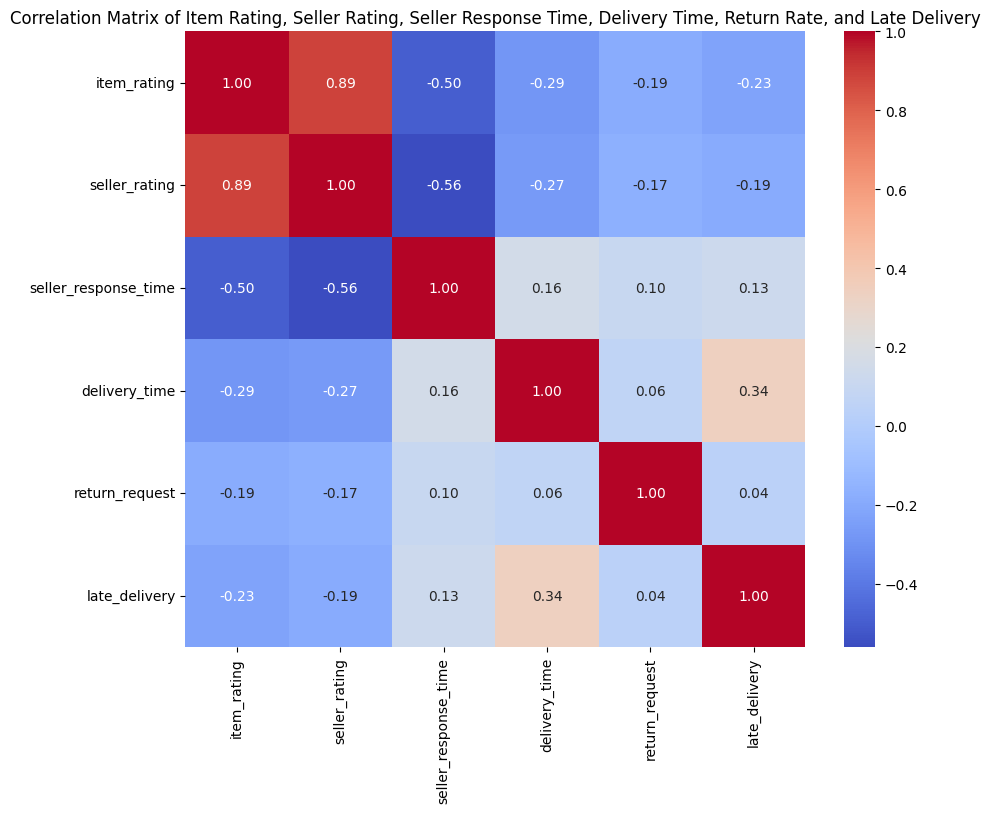

In [20]:
# prompt: create a correlation matrix visualization for the item rating,. seller rating, seller response time, delivery time and return rate and late delivery

# Assuming you have the 'orders_and_products' DataFrame as defined in your code.

# Select the columns you want to include in the correlation matrix
correlation_data = deliveries[['item_rating', 'seller_rating', 'seller_response_time', 'delivery_time', 'return_request', 'late_delivery']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap visualization using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Item Rating, Seller Rating, Seller Response Time, Delivery Time, Return Rate, and Late Delivery')
plt.show()

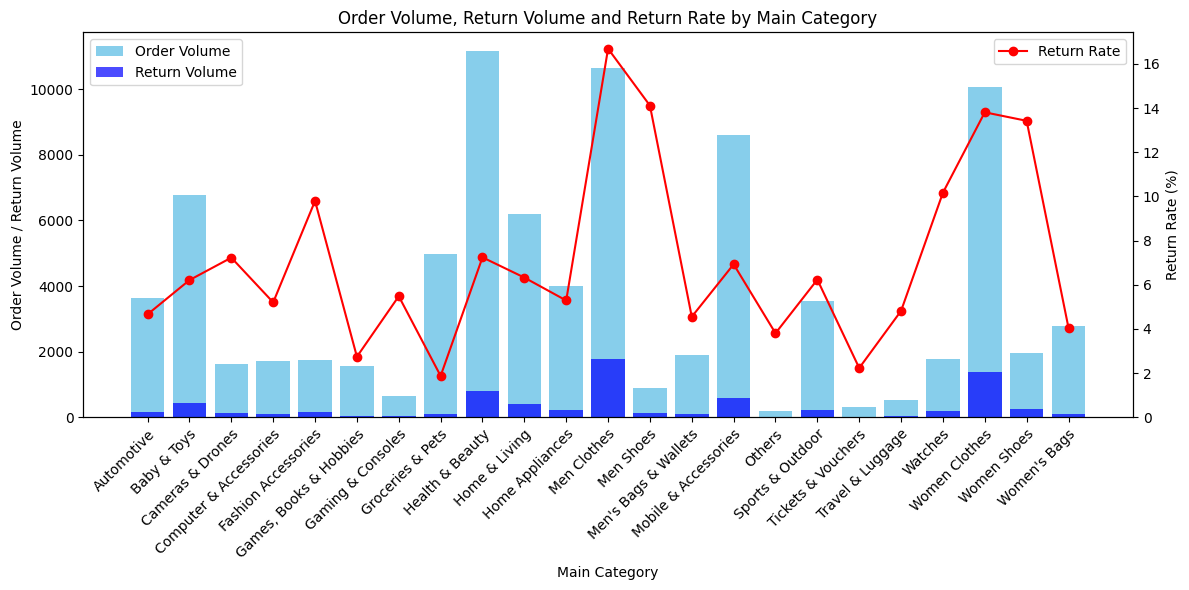

In [21]:
# prompt: Plot return rate and return volume = return rate x order volume by main category, put return volume and order volume on the left axis and return rate on the right axis, show return rate in %. Ensure that both y-axes start from 0

# Group data by main category and calculate relevant metrics
category_metrics = deliveries.groupby('main_category').agg(
    order_volume=('order_id', 'count'),
    return_volume=('return_request', 'sum')
)
category_metrics['return_rate'] = (category_metrics['return_volume'] / category_metrics['order_volume']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot order volume and return volume on the left y-axis
ax1.bar(category_metrics.index, category_metrics['order_volume'], label='Order Volume', color='skyblue')
ax1.bar(category_metrics.index, category_metrics['return_volume'], label='Return Volume', color='blue', alpha=0.7)
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Order Volume / Return Volume')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')


# Create a second y-axis for return rate
ax2 = ax1.twinx()
ax2.plot(category_metrics.index, category_metrics['return_rate'], label='Return Rate', color='red', marker='o')
ax2.set_ylabel('Return Rate (%)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Set y-axis limits to start from 0
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a title
plt.title('Order Volume, Return Volume and Return Rate by Main Category')

# Display the plot
plt.tight_layout()
plt.show()

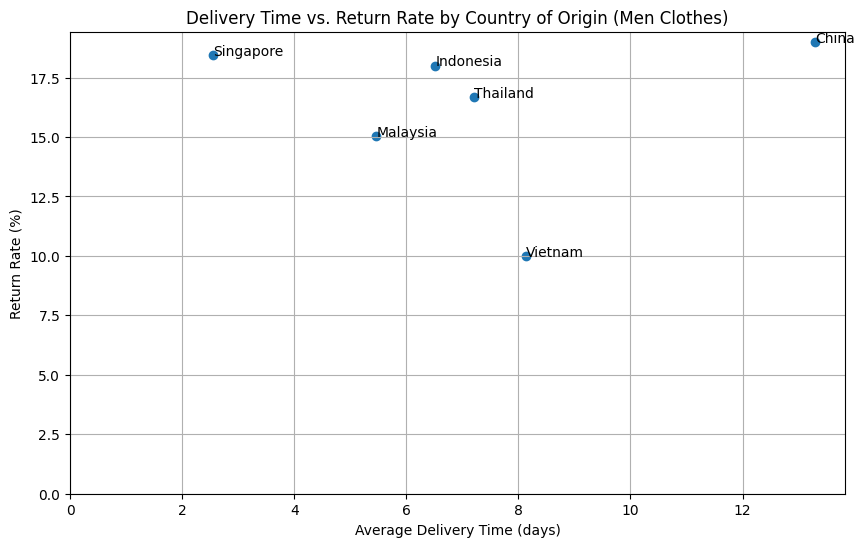

In [22]:
# prompt: Plot Delivery Time vs. Return Rate by country of origin for the category Men Clothes, makethe axis start from zero, keep return rate as percentage

# Assuming 'orders_and_products' DataFrame is already loaded and processed
men_clothes_df = deliveries[deliveries['main_category'] == 'Men Clothes']

# Group by 'Ships_From' and calculate the average delivery time and return rate for each country.
delivery_time_and_return_rate_by_country = men_clothes_df.groupby('shipped_from').agg({'delivery_time': 'mean', 'return_request': 'mean'})

# Create a scatter plot visualization.
plt.figure(figsize=(10, 6))
plt.scatter(delivery_time_and_return_rate_by_country['delivery_time'], delivery_time_and_return_rate_by_country['return_request'] * 100)  # Multiply return_request by 100 to show percentage
plt.xlabel('Average Delivery Time (days)')
plt.ylabel('Return Rate (%)')
plt.title('Delivery Time vs. Return Rate by Country of Origin (Men Clothes)')
plt.grid(True)

# Set axis to start from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add country labels to the points (optional).
for country, row in delivery_time_and_return_rate_by_country.iterrows():
  plt.annotate(country, (row['delivery_time'], row['return_request'] * 100))

plt.show()

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_1712\2516500843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_clothes_df['delivery_time_segment'] = pd.cut(men_clothes_df['delivery_time'], bins=bins, labels=labels, right=False)
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_1712\2516500843.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_country_and_segment = men_clothes_df.groupby(['shipped_from', 'delivery_time_segment'])['return_request'].mean().unstack()


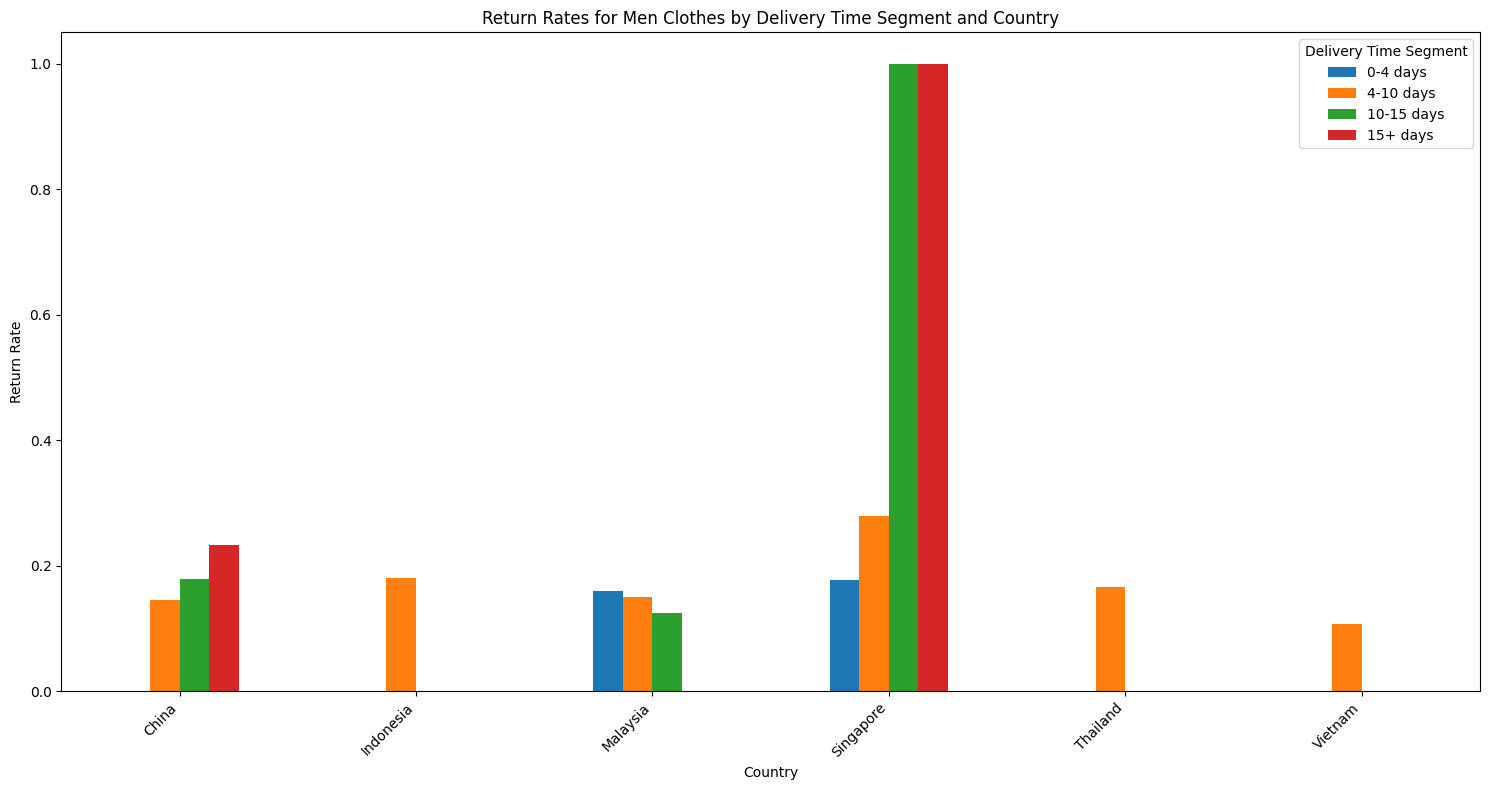

In [23]:
# prompt: Calculate return rates for Men’s Clothes based on different delivery time segments (e.g., 0to 3, 3to 5, 5to8, 8to 10, 10to15, 15+ days) for each country. and plot it in graph

# Assuming you have the 'orders_and_products' DataFrame as defined in your code.

# Filter for 'Men Clothes' category.
men_clothes_df = deliveries[deliveries['main_category'] == 'Men Clothes']

# Create bins for delivery time segments
bins = [0, 4, 10, 15, float('inf')]
labels = ['0-4 days', '4-10 days', '10-15 days', '15+ days']
men_clothes_df['delivery_time_segment'] = pd.cut(men_clothes_df['delivery_time'], bins=bins, labels=labels, right=False)

# Group by country and delivery time segment, then calculate the return rate.
return_rate_by_country_and_segment = men_clothes_df.groupby(['shipped_from', 'delivery_time_segment'])['return_request'].mean().unstack()

# Plot the return rates for each country across different delivery time segments
return_rate_by_country_and_segment.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Country')
plt.ylabel('Return Rate')
plt.title('Return Rates for Men Clothes by Delivery Time Segment and Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delivery Time Segment')
plt.tight_layout()
plt.show()

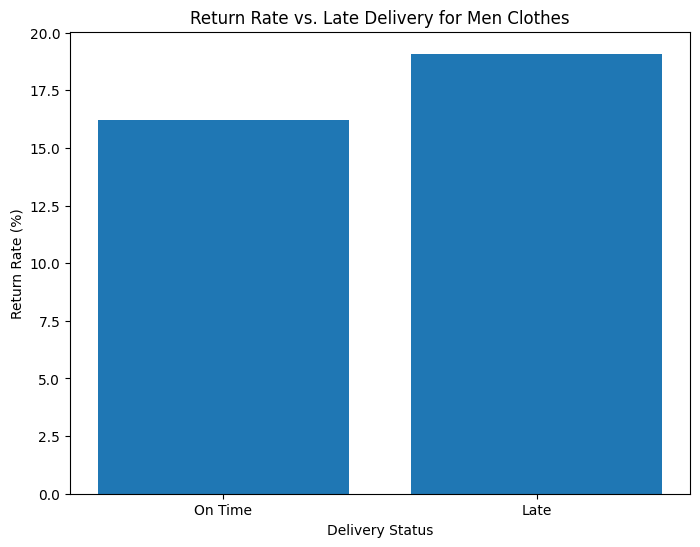

In [24]:
# prompt: # prompt: generate a graph of return rate vs late delivery for main_category on man clothes, using bar graph, change false to on time and true to late, make return rate in percentage

# Assuming you have the 'orders_and_products' DataFrame as defined in your code.

# Filter for 'Men Clothes' category.
men_clothes_df = deliveries[deliveries['main_category'] == 'Men Clothes']

# Calculate the return rate for each combination of late delivery and main category.
return_rate_by_late_delivery = men_clothes_df.groupby('late_delivery')['return_request'].mean()

# Replace 'False' and 'True' with "On Time" and "Late" for better clarity.
return_rate_by_late_delivery.index = return_rate_by_late_delivery.index.map({False: 'On Time', True: 'Late'})

# Convert return rate to percentage.
return_rate_by_late_delivery = return_rate_by_late_delivery * 100

# Create a bar chart visualization.
plt.figure(figsize=(8, 6))
plt.bar(return_rate_by_late_delivery.index, return_rate_by_late_delivery.values)
plt.xlabel('Delivery Status')
plt.ylabel('Return Rate (%)')
plt.title('Return Rate vs. Late Delivery for Men Clothes')
plt.show()

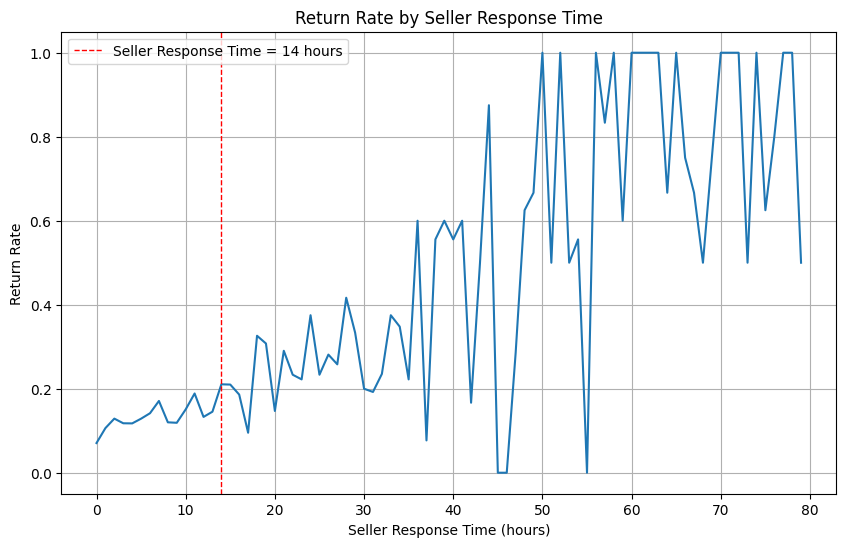

In [25]:
# prompt: Let return rate be the numbers of return request / total order, separate it based on the seller response time, bin the seller response time by hours, use a line graph instead,filter the above graph until 80 hours,

# Assuming 'orders_and_products' DataFrame is already loaded and processed

# Group data by seller response time (binned by hours) and calculate the return rate
deliveries['seller_response_time_bin'] = (deliveries['seller_response_time'] // 1).astype(int)  # Bin by hours
return_rate_by_response_time = deliveries.groupby('seller_response_time_bin')['return_request'].mean()

# Filter the data to include only response times up to 80 hours
return_rate_by_response_time = return_rate_by_response_time[return_rate_by_response_time.index <= 80]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(return_rate_by_response_time.index, return_rate_by_response_time.values)
plt.xlabel("Seller Response Time (hours)")
plt.ylabel("Return Rate")
plt.title("Return Rate by Seller Response Time")
plt.grid(True)

# Add a dotted vertical line at seller_response_time = 14
plt.axvline(x = 14, color='red', linestyle='--', linewidth=1, label='Seller Response Time = 14 hours')
plt.legend()

plt.show()

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_1712\1844872695.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seller_months = deliveries.groupby('seller_name').apply(calculate_months)


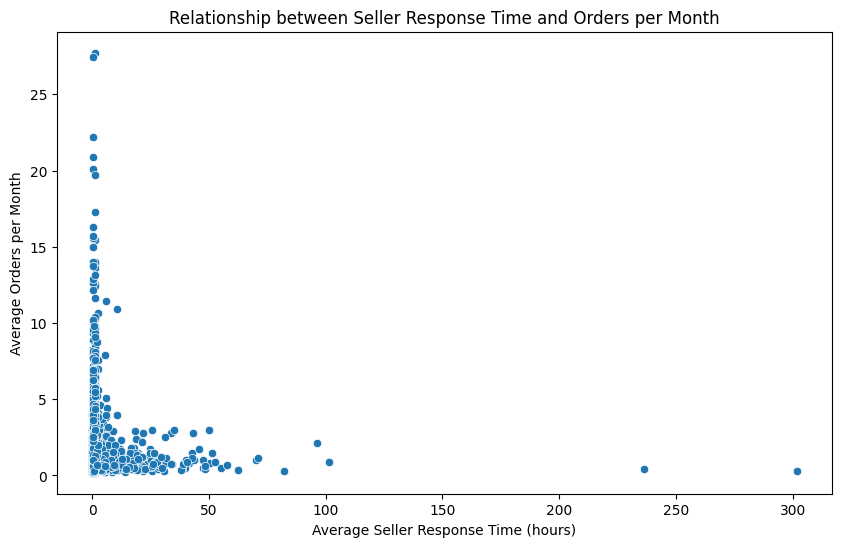

In [26]:
# prompt: can you group by sellers, and plot a graph that shows the relationship between the seller's response time and the number of orders they have per month? for the number of orders per month, take the number of orders they have in total, and divide by the number of months across the earliest order to the latest order.

import matplotlib.pyplot as plt

# Convert 'order_time' to datetime if it's not already
deliveries['order_time'] = pd.to_datetime(deliveries['order_time'])

# Calculate the number of months for each seller
def calculate_months(seller_data):
    min_date = seller_data['order_time'].min()
    max_date = seller_data['order_time'].max()
    months = (max_date.year - min_date.year) * 12 + (max_date.month - min_date.month)
    return months

seller_months = deliveries.groupby('seller_name').apply(calculate_months)

# Calculate orders per month for each seller
deliveries['orders_per_month'] = deliveries['seller_name'].map(
    deliveries.groupby('seller_name').size() / seller_months
)

# Group data by seller and calculate the mean response time and orders per month
seller_stats = deliveries.groupby('seller_name').agg(
    {'seller_response_time': 'mean', 'orders_per_month': 'mean'}
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seller_response_time', y='orders_per_month', data=seller_stats)
plt.xlabel("Average Seller Response Time (hours)")
plt.ylabel("Average Orders per Month")
plt.title("Relationship between Seller Response Time and Orders per Month")
plt.show()

Percentage of Late Deliveries Across Countries:
shipped_from
China          6.92
Indonesia     21.80
Malaysia      26.16
Singapore      3.18
South Korea    5.93
Taiwan         0.00
Thailand       0.00
Vietnam       19.75
Name: late_delivery, dtype: float64


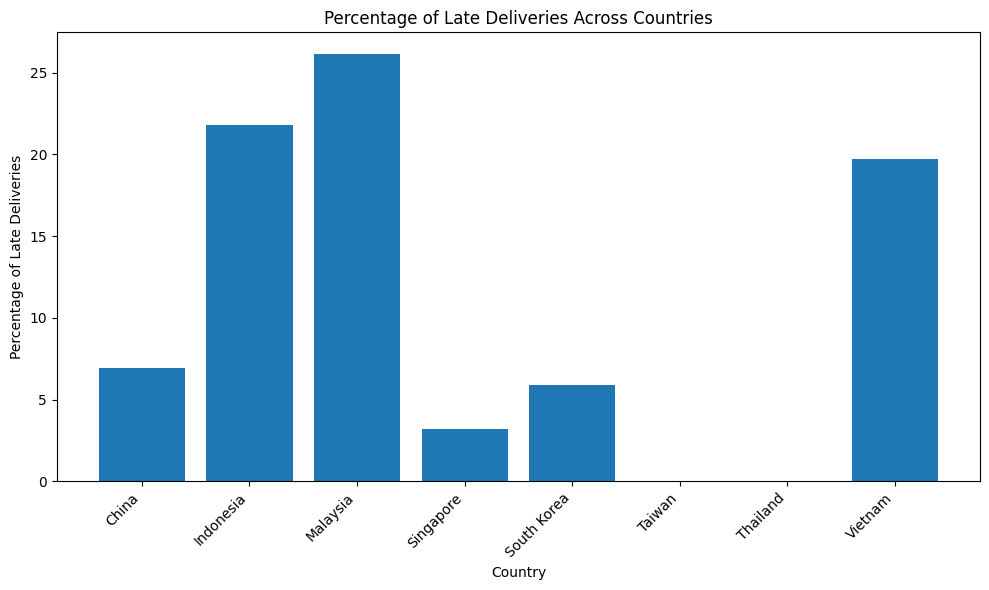

In [27]:
# prompt: show the percentage of late deliveries across each countries

# Group by country and calculate the percentage of late deliveries
late_delivery_percentage_by_country = deliveries.groupby('shipped_from')['late_delivery'].mean() * 100

# Print the results
print("Percentage of Late Deliveries Across Countries:")
print(late_delivery_percentage_by_country)

# Optionally, create a bar chart to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(late_delivery_percentage_by_country.index, late_delivery_percentage_by_country.values)
plt.xlabel("Country")
plt.ylabel("Percentage of Late Deliveries")
plt.title("Percentage of Late Deliveries Across Countries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [29]:
deliveries.seller_name.value_counts()

seller_name
v2optical          305
zanzea.os          302
want2buymall       244
love_to_read       230
hoehon             221
                  ... 
ainzulfiya1984       1
ongyanching0930      1
superpetos           1
joyoushop            1
sokano               1
Name: count, Length: 8443, dtype: Int64

In [35]:
products_dataset[products_dataset.product_id == 1176].title

1159    1 Pcs BedSheet Triangle Clip BedSheet Clipper ...
Name: title, dtype: object

In [36]:
products_dataset[products_dataset.product_id == 1760].title

1732    1 PC Thicken Door Crash Pads Bumper Rubber Ant...
Name: title, dtype: object

In [31]:
deliveries[deliveries.seller_name == 'v2optical'].sort_values(by='order_time')

,order_id,order_time,product_id,item_rating,seller_name,shipped_from,main_category,seller_rating,seller_response_time,delivery_time,additional_delivery_time,return_request,late_delivery,seller_response_time_bin,orders_per_month
9320,9321,2019-01-02 15:21:00,8508,4.80,v2optical,Malaysia,Health & Beauty,4.89,2.00,4.81,2.18,False,False,1,27.73
59934,59935,2019-01-04 09:53:00,5658,4.80,v2optical,Malaysia,Men Shoes,4.89,0.33,7.51,3.87,False,True,0,27.73
32575,32576,2019-01-07 15:13:00,1176,4.90,v2optical,Malaysia,Home & Living,4.89,1.10,5.45,3.89,False,False,1,27.73
19698,19699,2019-01-07 23:02:00,1760,4.90,v2optical,Malaysia,Baby & Toys,4.89,1.26,3.95,2.34,False,False,1,27.73
757,758,2019-01-08 14:06:00,6627,4.90,v2optical,Malaysia,Home & Living,4.89,1.49,4.29,3.11,True,False,1,27.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2245,2019-12-25 20:47:00,19109,4.90,v2optical,Malaysia,Baby & Toys,4.89,1.52,4.55,3.37,False,False,1,27.73
90108,90109,2019-12-26 13:46:00,1760,4.90,v2optical,Malaysia,Baby & Toys,4.89,1.48,6.26,3.55,False,True,1,27.73
34356,34357,2019-12-29 22:06:00,1343,4.90,v2optical,Malaysia,Home & Living,4.89,0.75,5.10,3.37,False,False,0,27.73
42304,42305,2019-12-29 22:44:00,976,4.80,v2optical,Singapore,Health & Beauty,4.89,1.52,1.95,0.00,False,False,1,27.73


In [38]:
deliveries['order_day'] = deliveries['order_time'].dt.date


In [48]:
x = deliveries[deliveries.seller_name == 'v2optical'].sort_values(by='order_time')[['order_day', 'product_id', 'main_category',	'seller_rating',	'seller_response_time',	'delivery_time',	'additional_delivery_time',	'return_request',	'late_delivery']]

In [49]:
x = pd.merge(x, products_dataset[['product_id', 'title']], on='product_id', how='left')

In [50]:
duplicates_order_day = x[x.duplicated(subset=['order_day'], keep=False)]


In [52]:
duplicates_order_day[duplicates_order_day.late_delivery == True]

,order_day,product_id,main_category,seller_rating,seller_response_time,delivery_time,additional_delivery_time,return_request,late_delivery,title
37,2019-02-15,2609,Home & Living,4.89,1.71,6.51,3.99,False,True,Portable Mini USB Soft Night Light LED Bright ...
45,2019-02-22,2530,Home & Living,4.89,0.58,6.56,3.22,False,True,Bendable Mini USB LED Lamp Flexible 5V 1.2W Bo...
63,2019-03-17,893,Home & Living,4.89,1.89,6.42,3.46,False,True,(1 METER) 3 Modes Mini LED Fairy String Lights...
73,2019-03-30,8508,Health & Beauty,4.89,0.78,7.01,3.89,False,True,1 PCS Portable Toothbrush Case Travel Toothbru...
75,2019-03-30,11668,Home Appliances,4.89,1.00,6.81,3.55,False,True,Hand-held Electric Egg beater Foamer Milk Drin...
79,2019-04-04,39,Baby & Toys,4.89,1.48,6.25,3.83,False,True,(1 PC) Socket Cover Baby Kid Children Safety 3...
81,2019-04-06,1760,Baby & Toys,4.89,0.56,6.14,3.38,False,True,1 PC Thicken Door Crash Pads Bumper Rubber Ant...
105,2019-04-27,9167,Home & Living,4.89,1.96,6.30,3.52,False,True,(1 pcs)Refrigerator Storage Partition Splint B...
119,2019-05-14,8508,Health & Beauty,4.89,0.40,7.27,3.59,False,True,1 PCS Portable Toothbrush Case Travel Toothbru...
121,2019-05-15,16282,Home & Living,4.89,1.79,7.03,3.55,False,True,(1 PC) Compressed Towel Disposable Candy Cotto...


In [54]:
products_dataset.columns

Index(['price_ori', 'item_category_detail', 'title', 'item_rating',
       'seller_name', 'price_actual', 'total_rating', 'total_sold', 'favorite',
       'desc', 'Stock', 'Ships_From', 'product_id', 'main_category',
       'mid_category', 'sub_category'],
      dtype='object')